In [1]:
import pandas as pd
import numpy as np
import string
import spacy

import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
from wordcloud import wordcloud
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv("C:\\Users\\kiran\\Downloads\\SalaryData_Train.csv")
data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
data.mean()

C:\Users\kiran\AppData\Local\Temp/ipykernel_864/531903386.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.mean()


age               38.438115
educationno       10.121316
capitalgain     1092.044064
capitalloss       88.302311
hoursperweek      40.931269
dtype: float64

In [4]:
data.median()

C:\Users\kiran\AppData\Local\Temp/ipykernel_864/4184645713.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.median()


age             37.0
educationno     10.0
capitalgain      0.0
capitalloss      0.0
hoursperweek    40.0
dtype: float64

In [5]:
data.mode()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,36,Private,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,<=50K


In [6]:
data.skew()

C:\Users\kiran\AppData\Local\Temp/ipykernel_864/1188251951.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.skew()


age              0.530180
educationno     -0.305378
capitalgain     11.902483
capitalloss      4.528238
hoursperweek     0.330856
dtype: float64

In [7]:
data.kurt()

C:\Users\kiran\AppData\Local\Temp/ipykernel_864/2907027414.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.kurt()


age              -0.144760
educationno       0.643605
capitalgain     153.661174
capitalloss      19.529284
hoursperweek      3.167683
dtype: float64

In [8]:
data.corr()

,age,educationno,capitalgain,capitalloss,hoursperweek
age,1.000000,0.043525,0.080152,0.060278,0.101598
educationno,0.043525,1.000000,0.124416,0.079691,0.152522
capitalgain,0.080152,0.124416,1.000000,-0.032218,0.080431
capitalloss,0.060278,0.079691,-0.032218,1.000000,0.052454
hoursperweek,0.101598,0.152522,0.080431,0.052454,1.000000


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'educationno'}>],
       [<AxesSubplot:title={'center':'capitalgain'}>,
        <AxesSubplot:title={'center':'capitalloss'}>],
       [<AxesSubplot:title={'center':'hoursperweek'}>, <AxesSubplot:>]],
      dtype=object)

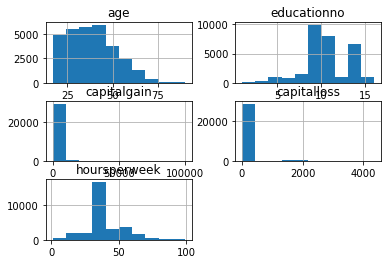

In [9]:
data.hist()

<AxesSubplot:>

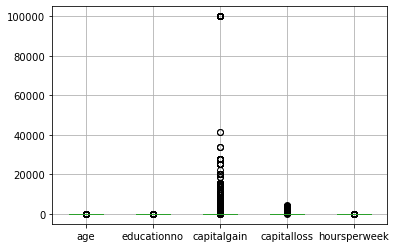

In [10]:
data.boxplot()

In [11]:
data.isnull()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,False,False,False,False,False,False,False,False,False,False,False,False,False,False
30157,False,False,False,False,False,False,False,False,False,False,False,False,False,False
30158,False,False,False,False,False,False,False,False,False,False,False,False,False,False
30159,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
30156    False
30157     True
30158    False
30159     True
30160    False
Length: 30161, dtype: bool

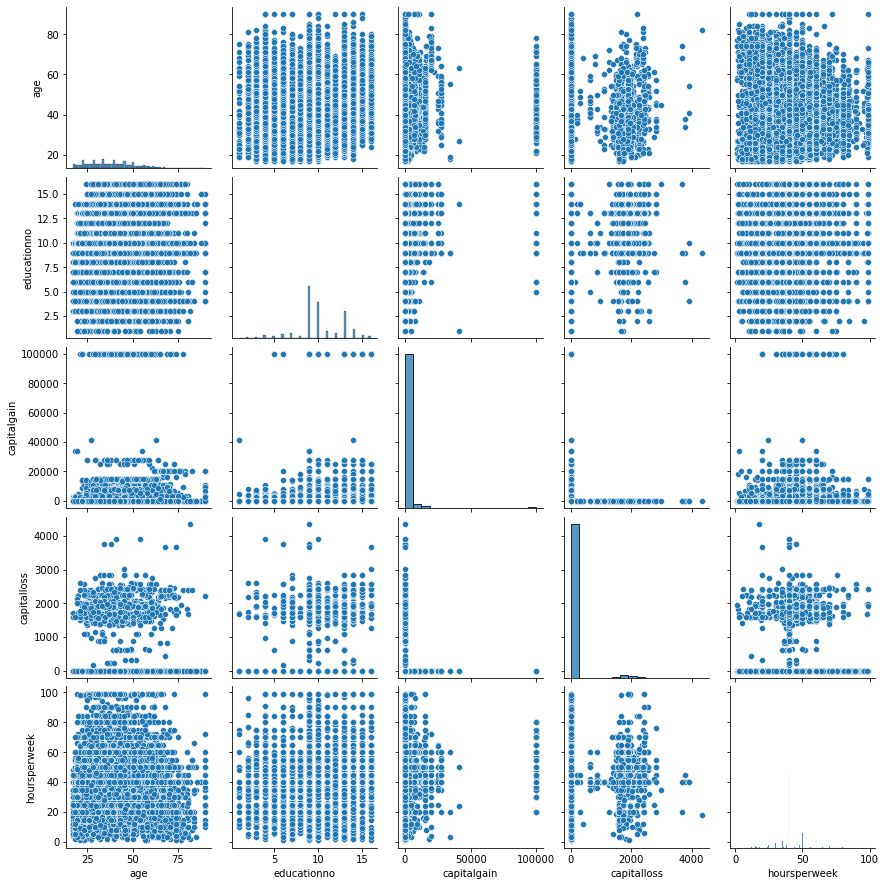

In [13]:
sns.pairplot(data)

<AxesSubplot:ylabel='Salary'>

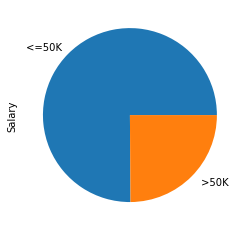

In [59]:
data["Salary"].value_counts()
data.Salary.value_counts().plot(kind="pie")


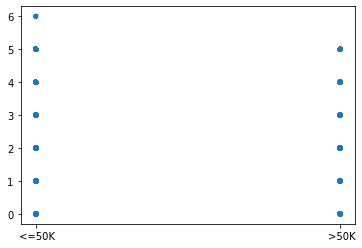

In [60]:
plt.scatter(data.Salary,data.workclass,data.education)

{'bodies': [<matplotlib.collections.PolyCollection at 0x1d54d065eb0>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1d54d065df0>,
 'cmins': <matplotlib.collections.LineCollection at 0x1d54d076430>,
 'cbars': <matplotlib.collections.LineCollection at 0x1d54d076760>}

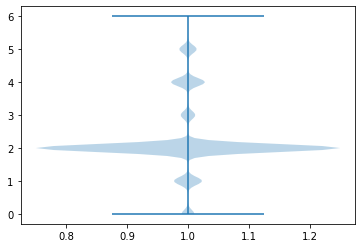

In [62]:
plt.violinplot(data["workclass"])

In [63]:
data.describe()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
count,30161.000000,30161.00000,30161.00000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,2.19933,10.33361,10.121316,2.580087,5.959849,1.418322,3.678592,0.675707,1092.044064,88.302311,40.931269,35.413481
std,13.134830,0.95394,3.81226,2.550037,1.498018,4.029633,1.601361,0.834721,0.468118,7406.466611,404.121321,11.980182,5.956430
min,17.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,2.00000,9.00000,9.000000,2.000000,2.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,37.000000
50%,37.000000,2.00000,11.00000,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,37.000000
75%,47.000000,2.00000,12.00000,13.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,37.000000
max,90.000000,6.00000,15.00000,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,39.000000


In [14]:
data['Salary'].value_counts()

 <=50K    22653
 >50K      7508
Name: Salary, dtype: int64

In [15]:
# Lets do label-Encoding :-

In [16]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [17]:
data['workclass'] = label_encoder.fit_transform(data.workclass)

In [18]:
data['education'] = label_encoder.fit_transform(data.education)

In [19]:
data['maritalstatus'] = label_encoder.fit_transform(data.maritalstatus)

In [20]:
data['occupation'] = label_encoder.fit_transform(data.occupation)

In [21]:
data['relationship'] = label_encoder.fit_transform(data.relationship)

In [22]:
data['race'] = label_encoder.fit_transform(data.race)

In [23]:
data['sex'] = label_encoder.fit_transform(data.sex)

In [24]:
data['native'] = label_encoder.fit_transform(data.native)

In [25]:
data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,<=50K
1,50,4,9,13,2,3,0,4,1,0,0,13,37,<=50K
2,38,2,11,9,0,5,1,4,1,0,0,40,37,<=50K
3,53,2,1,7,2,5,0,2,1,0,0,40,37,<=50K
4,28,2,9,13,2,9,5,2,0,0,0,40,4,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,12,2,12,5,4,0,0,0,38,37,<=50K
30157,40,2,11,9,2,6,0,4,1,0,0,40,37,>50K
30158,58,2,11,9,6,0,4,4,0,0,0,40,37,<=50K
30159,22,2,11,9,4,0,3,4,1,0,0,20,37,<=50K


In [26]:
# Lets make our data scale free :-

In [27]:
def std_data(i):
    result = (i-i.min())/(i.max()-i.min())
    return result

In [28]:
std_data = std_data(data.iloc[:,:-1])

In [29]:
#std_data['Salary']=data.Salary

In [30]:
std_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,0.301370,0.833333,0.600000,0.800000,0.666667,0.000000,0.2,1.0,1.0,0.021740,0.0,0.397959,0.948718
1,0.452055,0.666667,0.600000,0.800000,0.333333,0.230769,0.0,1.0,1.0,0.000000,0.0,0.122449,0.948718
2,0.287671,0.333333,0.733333,0.533333,0.000000,0.384615,0.2,1.0,1.0,0.000000,0.0,0.397959,0.948718
3,0.493151,0.333333,0.066667,0.400000,0.333333,0.384615,0.0,0.5,1.0,0.000000,0.0,0.397959,0.948718
4,0.150685,0.333333,0.600000,0.800000,0.333333,0.692308,1.0,0.5,0.0,0.000000,0.0,0.397959,0.102564
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,0.136986,0.333333,0.466667,0.733333,0.333333,0.923077,1.0,1.0,0.0,0.000000,0.0,0.377551,0.948718
30157,0.315068,0.333333,0.733333,0.533333,0.333333,0.461538,0.0,1.0,1.0,0.000000,0.0,0.397959,0.948718
30158,0.561644,0.333333,0.733333,0.533333,1.000000,0.000000,0.8,1.0,0.0,0.000000,0.0,0.397959,0.948718
30159,0.068493,0.333333,0.733333,0.533333,0.666667,0.000000,0.6,1.0,1.0,0.000000,0.0,0.193878,0.948718


In [31]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()

In [32]:
classifier.fit(std_data, data.Salary)

GaussianNB()

In [33]:
prediction = classifier.predict(std_data)
prediction

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype='<U6')

In [34]:
from sklearn.metrics import accuracy_score

In [35]:
Accuracy = accuracy_score(prediction, data.Salary)

Accuracy

0.797586286926826

In [36]:
# for Testing data :-

In [37]:
test_data = pd.read_csv("C:\\Users\\kiran\\Downloads\\SalaryData_Test.csv")
test_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [45]:
test_data.mean()

C:\Users\kiran\AppData\Local\Temp/ipykernel_864/1308149931.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  test_data.mean()


age                38.768327
workclass           2.214874
education          10.272377
educationno        10.112749
maritalstatus       2.595286
occupation          5.989044
relationship        1.401394
race                3.683665
sex                 0.673772
capitalgain      1120.301594
capitalloss        89.041899
hoursperweek       40.951594
native             35.467596
dtype: float64

In [46]:
test_data.median()

C:\Users\kiran\AppData\Local\Temp/ipykernel_864/2144172041.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  test_data.median()


age              37.0
workclass         2.0
education        11.0
educationno      10.0
maritalstatus     2.0
occupation        6.0
relationship      1.0
race              4.0
sex               1.0
capitalgain       0.0
capitalloss       0.0
hoursperweek     40.0
native           37.0
dtype: float64

In [47]:
test_data.mode()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,35,2,11,9,2,3,0,4,1,0,0,40,37,<=50K


In [48]:
test_data.skew()

C:\Users\kiran\AppData\Local\Temp/ipykernel_864/3584916244.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  test_data.skew()


age               0.536112
workclass         1.136978
education        -0.947190
educationno      -0.320999
maritalstatus    -0.001770
occupation        0.100555
relationship      0.847138
race             -2.541787
sex              -0.741370
capitalgain      11.570156
capitalloss       4.496738
hoursperweek      0.359502
native           -4.253526
dtype: float64

In [49]:
test_data.kurt()

C:\Users\kiran\AppData\Local\Temp/ipykernel_864/2157932215.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  test_data.kurt()


age               -0.181312
workclass          2.206606
education          0.755833
educationno        0.618468
maritalstatus     -0.533775
occupation        -1.251637
relationship      -0.656440
race               5.507940
sex               -1.450564
capitalgain      143.591390
capitalloss       19.080685
hoursperweek       3.267311
native            18.038369
dtype: float64

In [51]:
test_data.isnull()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,False,False,False,False,False,False,False,False,False,False,False,False,False,False
15056,False,False,False,False,False,False,False,False,False,False,False,False,False,False
15057,False,False,False,False,False,False,False,False,False,False,False,False,False,False
15058,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [50]:
test_data.corr()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
age,1.000000,0.096037,-0.007948,0.026123,-0.262577,-0.002214,-0.249701,0.024485,0.082265,0.078760,0.057745,0.102758,-0.005683
workclass,0.096037,1.000000,0.018005,0.046623,-0.031329,0.021271,-0.060235,0.059749,0.059161,0.032980,0.010242,0.052614,-0.003635
education,-0.007948,0.018005,1.000000,0.351486,-0.043117,-0.023999,-0.014227,0.012133,-0.026978,0.028626,0.020568,0.062892,0.077065
educationno,0.026123,0.046623,0.351486,1.000000,-0.068079,0.093643,-0.081413,0.029355,-0.002052,0.131750,0.085817,0.133691,0.097188
maritalstatus,-0.262577,-0.031329,-0.043117,-0.068079,1.000000,0.003854,0.185495,-0.073718,-0.120374,-0.042405,-0.034073,-0.171665,-0.016532
occupation,-0.002214,0.021271,-0.023999,0.093643,0.003854,1.000000,-0.047381,-0.001561,0.045244,0.014165,0.016580,0.011755,-0.001311
relationship,-0.249701,-0.060235,-0.014227,-0.081413,0.185495,-0.047381,1.000000,-0.121481,-0.579212,-0.054040,-0.048091,-0.261905,0.000500
race,0.024485,0.059749,0.012133,0.029355,-0.073718,-0.001561,-0.121481,1.000000,0.088450,0.013539,0.015799,0.037125,0.125514
sex,0.082265,0.059161,-0.026978,-0.002052,-0.120374,0.045244,-0.579212,0.088450,1.000000,0.044843,0.045360,0.231744,-0.014178
capitalgain,0.078760,0.032980,0.028626,0.131750,-0.042405,0.014165,-0.054040,0.013539,0.044843,1.000000,-0.031876,0.090501,0.005923


In [52]:
test_data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
15055    False
15056    False
15057    False
15058    False
15059    False
Length: 15060, dtype: bool

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'workclass'}>,
        <AxesSubplot:title={'center':'education'}>,
        <AxesSubplot:title={'center':'educationno'}>],
       [<AxesSubplot:title={'center':'maritalstatus'}>,
        <AxesSubplot:title={'center':'occupation'}>,
        <AxesSubplot:title={'center':'relationship'}>,
        <AxesSubplot:title={'center':'race'}>],
       [<AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'capitalgain'}>,
        <AxesSubplot:title={'center':'capitalloss'}>,
        <AxesSubplot:title={'center':'hoursperweek'}>],
       [<AxesSubplot:title={'center':'native'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

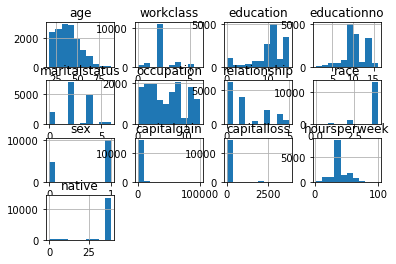

In [53]:
test_data.hist()

<AxesSubplot:>

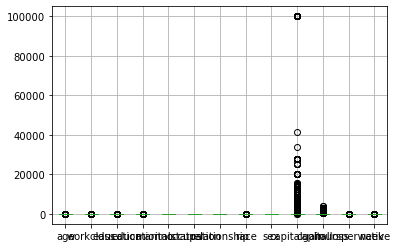

In [54]:
test_data.boxplot()

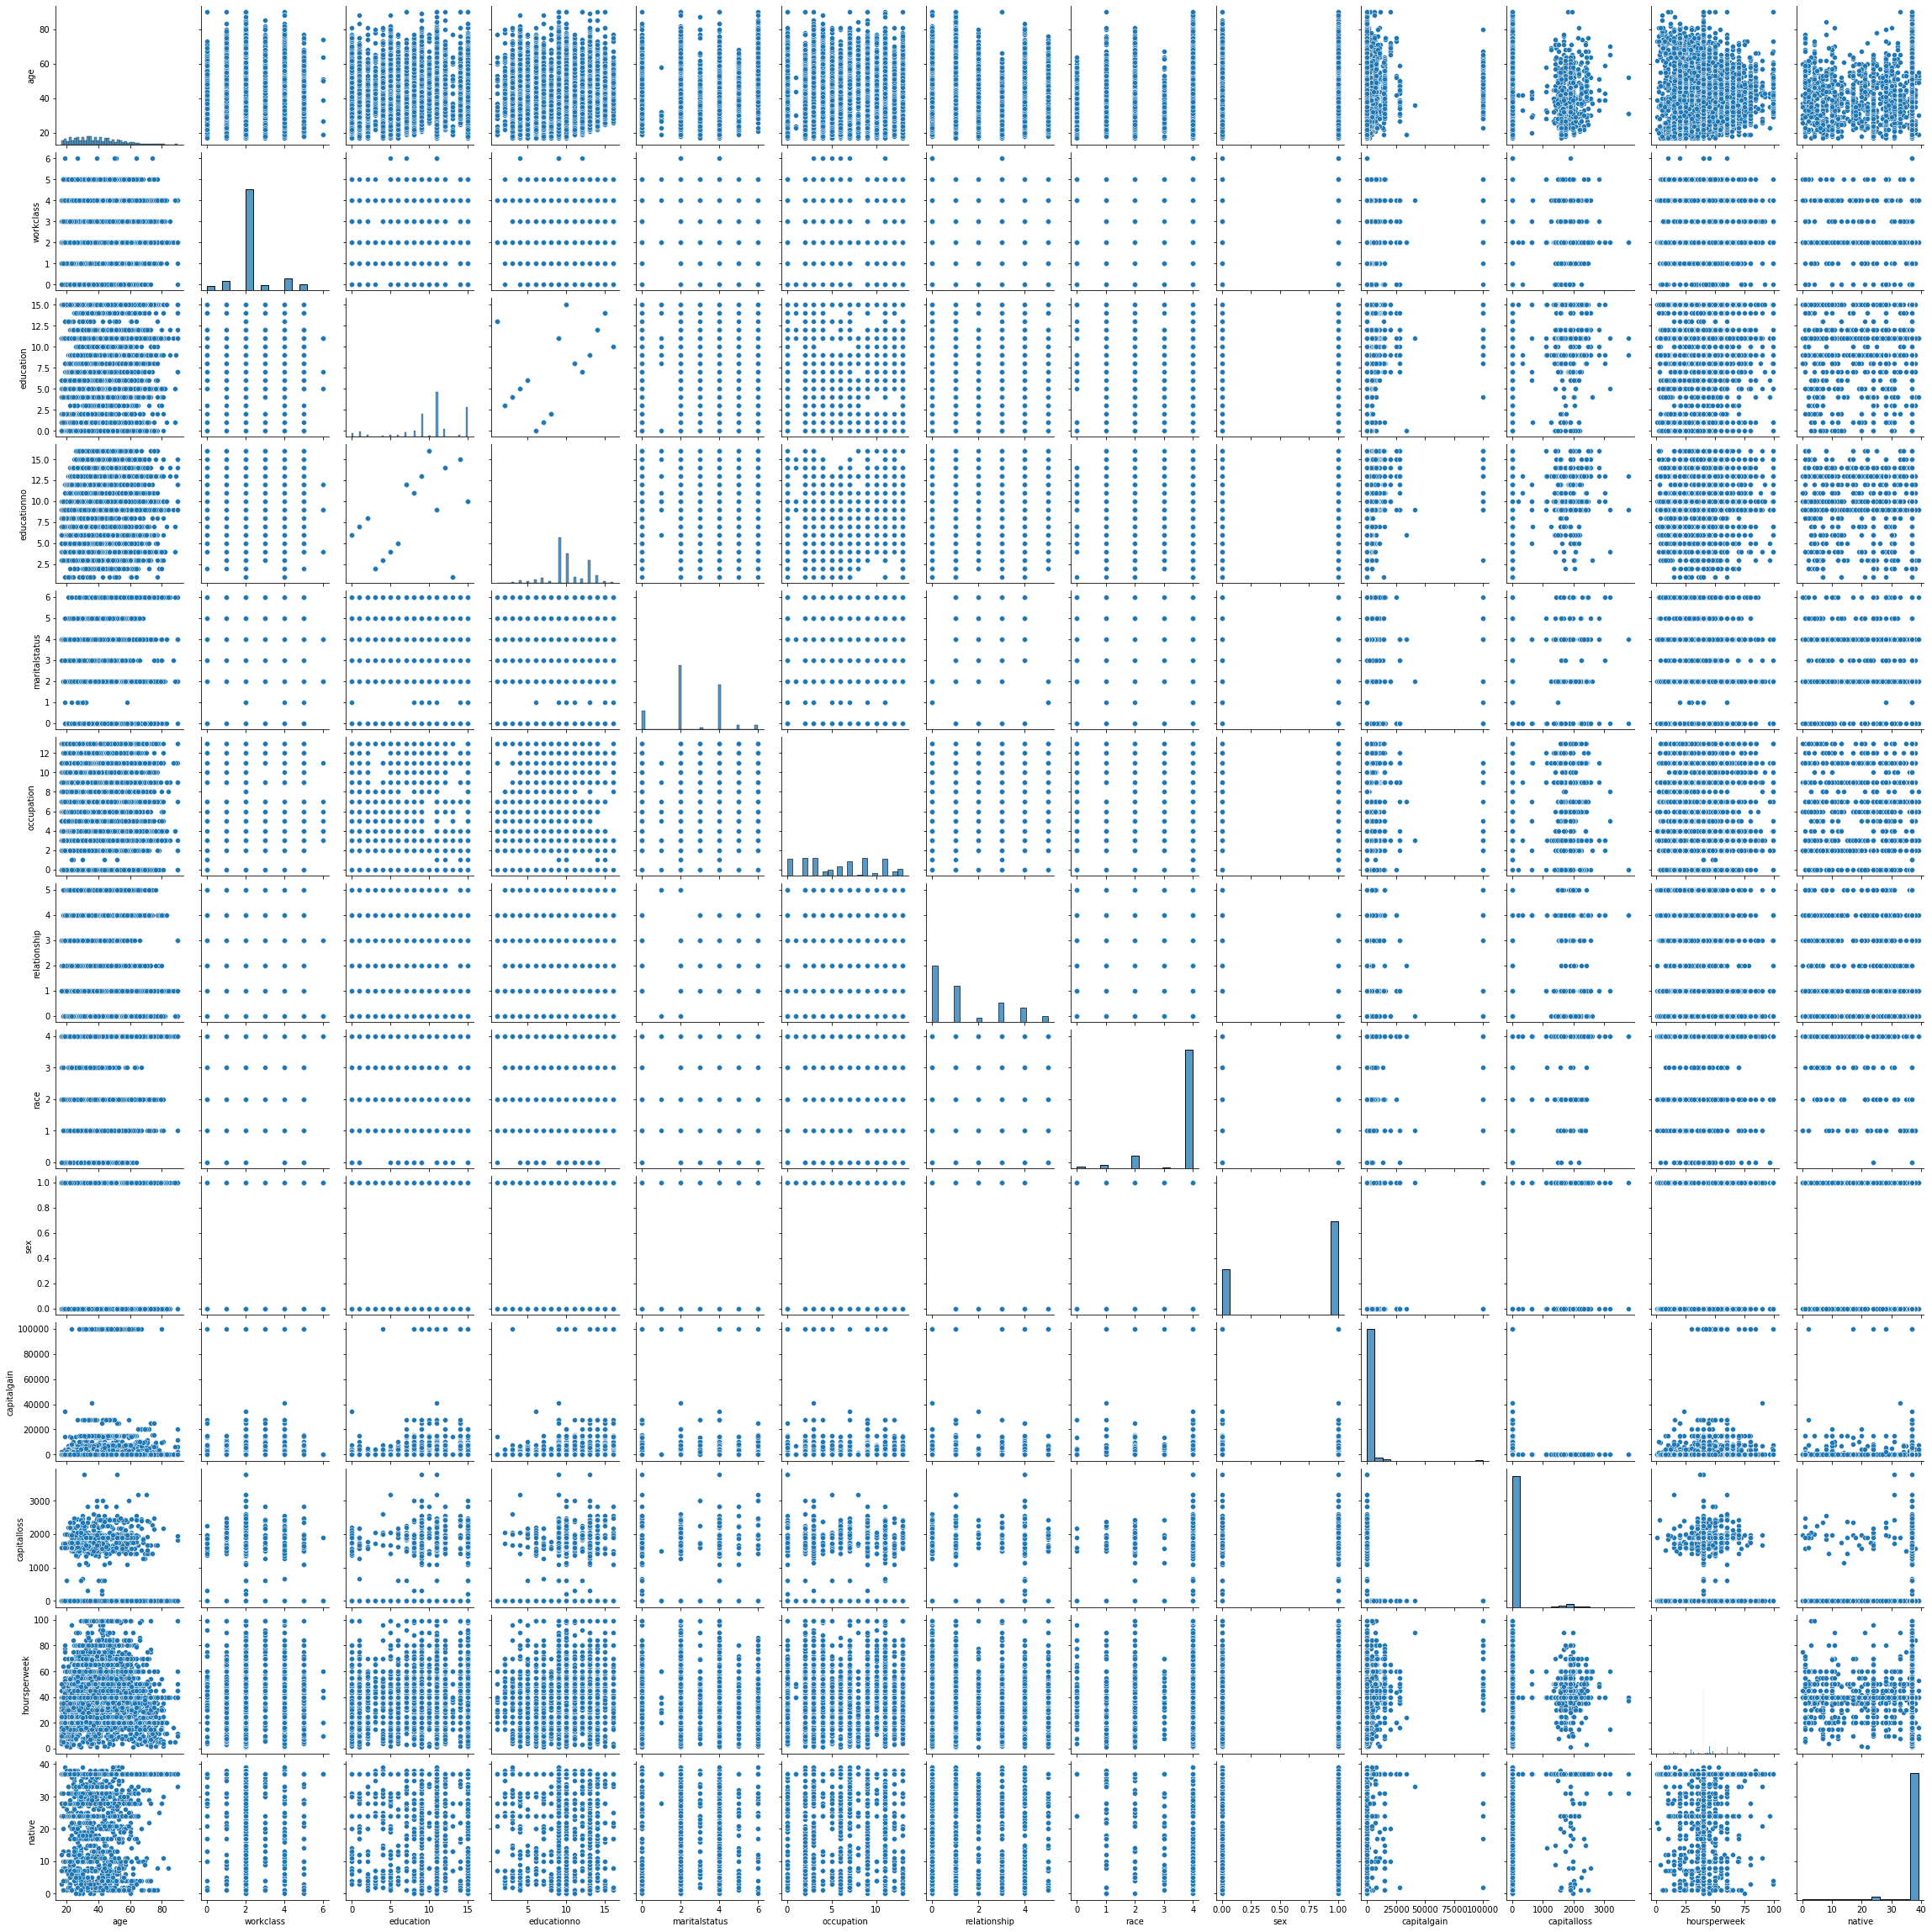

In [55]:
sns.pairplot(test_data)

<AxesSubplot:ylabel='Salary'>

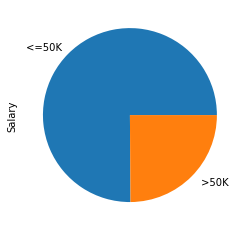

In [64]:
test_data["Salary"].value_counts()
data.Salary.value_counts().plot(kind="pie")


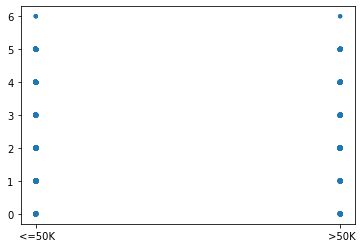

In [65]:
plt.scatter(test_data.Salary,test_data.workclass,test_data.education)

{'bodies': [<matplotlib.collections.PolyCollection at 0x1d54d4ce430>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1d54d4ce3a0>,
 'cmins': <matplotlib.collections.LineCollection at 0x1d54d4ce970>,
 'cbars': <matplotlib.collections.LineCollection at 0x1d54d4ceca0>}

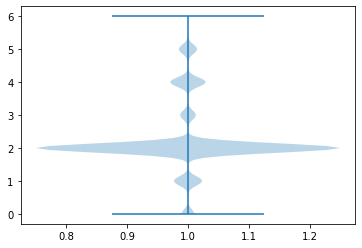

In [66]:
plt.violinplot(test_data["workclass"])

In [67]:
test_data.describe()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,2.214874,10.272377,10.112749,2.595286,5.989044,1.401394,3.683665,0.673772,1120.301594,89.041899,40.951594,35.467596
std,13.380676,0.966422,3.826251,2.558727,1.505336,4.020113,1.588954,0.827630,0.468848,7703.181842,406.283245,12.062831,5.880922
min,17.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,2.000000,9.000000,9.000000,2.000000,2.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,37.000000
50%,37.000000,2.000000,11.000000,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,37.000000
75%,48.000000,2.000000,12.000000,13.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,37.000000
max,90.000000,6.000000,15.000000,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,99999.000000,3770.000000,99.000000,39.000000


In [38]:
test_data['workclass'] = label_encoder.fit_transform(test_data.workclass)
test_data['education'] = label_encoder.fit_transform(test_data.education)
test_data['maritalstatus'] = label_encoder.fit_transform(test_data.maritalstatus)
test_data['occupation'] = label_encoder.fit_transform(test_data.occupation)
test_data['relationship'] = label_encoder.fit_transform(test_data.relationship)
test_data['race'] = label_encoder.fit_transform(test_data.race)
test_data['sex'] = label_encoder.fit_transform(test_data.sex)
test_data['native'] = label_encoder.fit_transform(test_data.native)

In [39]:
# make our test data scale free

In [40]:
def std_data(i):
    result = (i-i.min())/(i.max()-i.min())
    return result

In [41]:
std_test_data = std_data(test_data.iloc[:,:-1])

In [42]:
std_test_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,0.109589,0.333333,0.066667,0.400000,0.666667,0.461538,0.6,0.50,1.0,0.000000,0.0,0.397959,0.948718
1,0.287671,0.333333,0.733333,0.533333,0.333333,0.307692,0.0,1.00,1.0,0.000000,0.0,0.500000,0.948718
2,0.150685,0.166667,0.466667,0.733333,0.333333,0.769231,0.0,1.00,1.0,0.000000,0.0,0.397959,0.948718
3,0.369863,0.333333,1.000000,0.600000,0.333333,0.461538,0.0,0.50,1.0,0.076881,0.0,0.397959,0.948718
4,0.232877,0.333333,0.000000,0.333333,0.666667,0.538462,0.2,1.00,1.0,0.000000,0.0,0.295918,0.948718
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,0.219178,0.333333,0.600000,0.800000,0.666667,0.692308,0.6,1.00,1.0,0.000000,0.0,0.397959,0.948718
15056,0.301370,0.333333,0.600000,0.800000,0.000000,0.692308,0.2,1.00,0.0,0.000000,0.0,0.357143,0.948718
15057,0.287671,0.333333,0.600000,0.800000,0.333333,0.692308,0.0,1.00,1.0,0.000000,0.0,0.500000,0.948718
15058,0.369863,0.333333,0.600000,0.800000,0.000000,0.000000,0.6,0.25,1.0,0.054551,0.0,0.397959,0.948718


In [43]:
test_prediction = classifier.predict(std_test_data)

In [44]:
Accuracy = accuracy_score(test_prediction, test_data.Salary)
Accuracy

0.796812749003984

# we are getting the accuracy for testing data is 79.68 %.